In [1]:
import numpy as np
import pandas as pd

train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [2]:
df = pd.concat([train_set,test_set])

In [37]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [3]:
import numpy as np
df['wage_class'] = np.where((df['wage_class'] == ' >50K') | (df['wage_class'] == ' >50K.'),1,0)

In [42]:
df.wage_class.value_counts()

0    37155
1    11687
Name: wage_class, dtype: int64

In [46]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


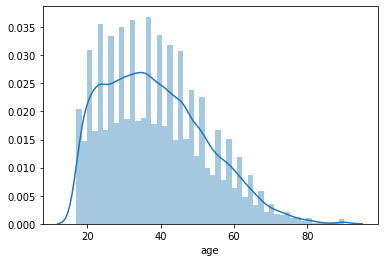

In [49]:
sns.distplot(df['age'])

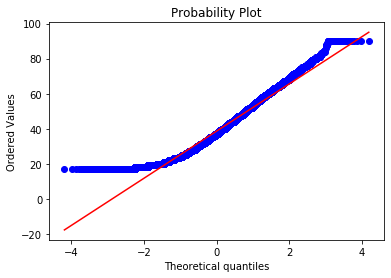

In [24]:
import scipy.stats as stats
import pylab
import numpy as np
import matplotlib.pyplot as plt
stats.probplot((df['age']),plot=pylab)
plt.show()

In [67]:
df.fnlwgt.describe()

count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

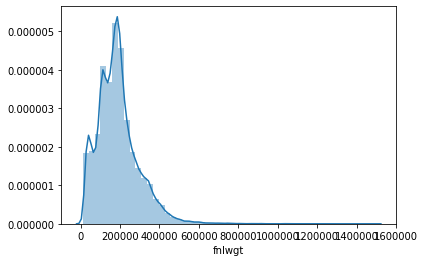

In [69]:
sns.distplot(df['fnlwgt'])

In [74]:
df.tail()

,age,workclass,fnlwgt,education_num,capital_loss,hours_per_week,native_country,wage_class,education_ 11th,education_ 12th,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
16276,39,Private,215419,13,0,36,United-States,0,0,0,...,1,0,0,0,0,0,0,0,1,0
16277,64,?,321403,9,0,40,United-States,0,0,0,...,0,1,0,0,0,0,1,0,0,1
16278,38,Private,374983,13,0,50,United-States,0,0,0,...,0,0,0,0,0,0,0,0,1,1
16279,44,Private,83891,13,0,40,United-States,0,0,0,...,0,0,1,0,0,1,0,0,0,1
16280,35,Self-emp-inc,182148,13,0,60,United-States,1,0,0,...,0,0,0,0,0,0,0,0,1,1


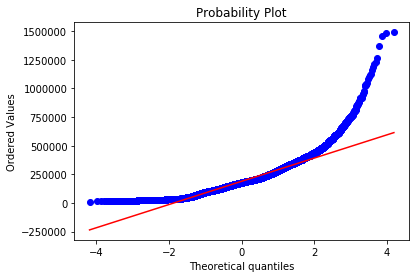

In [4]:
import scipy.stats as stats
impaort pylab
import numpy as np
import matplotlib.pyplot as plt
stats.probplot((df['fnlwgt']),plot=pylab)
plt.show()

In [4]:
df=pd.get_dummies(columns=['education'],drop_first=True,data=df)

In [5]:
df=pd.get_dummies(columns=['marital_status'],drop_first=True,data=df)

In [6]:
df=pd.get_dummies(columns=['occupation'],drop_first=True,data=df)

In [7]:
df=pd.get_dummies(columns=['relationship','race','sex'],drop_first=True,data=df)

In [22]:
df.capital_gain.describe()

count    48842.000000
mean      1079.067626
std       7452.019058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64

In [30]:
np.where(df['capital_gain'] == 99999)

(array([ 1246,  1368,  1482,  1528,  1616,  1682,  1765,  1771,  1826,
         2103,  2319,  2361,  2707,  3105,  3175,  3368,  3836,  4389,
         4421,  4625,  4656,  4898,  5098,  5184,  5473,  5588,  6002,
         6035,  6225,  6524,  6751,  7090,  7347,  7517,  7553,  7572,
         7629,  7745,  8442,  8476,  8710,  8740,  8742,  9184,  9228,
         9673,  9760, 10366, 10661, 10771, 10848, 10962, 10964, 11485,
        11976, 12062, 12093, 12141, 12533, 12539, 12655, 12677, 12909,
        13422, 13455, 13499, 13997, 14117, 14238, 14579, 14827, 15100,
        15279, 15604, 15737, 15904, 16079, 16174, 16422, 16740, 17330,
        17538, 17644, 17665, 17789, 18080, 18126, 18315, 18408, 18463,
        18654, 18882, 19080, 19084, 19133, 19438, 19807, 19900, 20055,
        20283, 20613, 20987, 21188, 21489, 21992, 22275, 22317, 22361,
        22385, 22749, 22811, 23087, 23467, 23678, 23999, 24008, 24067,
        24105, 24200, 24285, 24295, 24510, 24638, 24673, 24850, 24983,
      

In [8]:
df.drop('capital_gain',axis = 1,inplace=True)

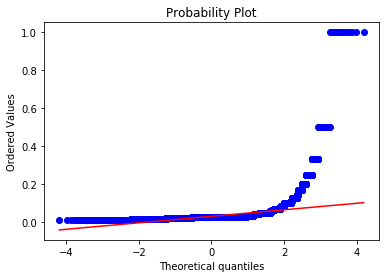

In [52]:
import scipy.stats as stats
import pylab
import numpy as np
import matplotlib.pyplot as plt
stats.probplot(1/(df['hours_per_week']),plot=pylab)
plt.show()

In [9]:
df['native_country'] = np.where(df['native_country'] == ' ?' ,df['native_country'].mode(),df['native_country'])

In [10]:
list1 = df['native_country'].value_counts().head(8).index

In [157]:
list1 
#list(list1)

Index([' United-States', ' Mexico', ' Philippines', ' Germany', ' Puerto-Rico',
       ' Canada', ' El-Salvador', ' India'],
      dtype='object')

In [11]:
df['native_country_USA'] =  np.where(df['native_country'] == ' United-States',1,0)

In [12]:
df['native_country_Mexico'] =  np.where(df['native_country'] == ' Mexico',1,0)

In [13]:
df['native_country_Pilip'] =  np.where(df['native_country'] == ' Philippines',1,0)

In [14]:
df['native_country_Germany'] =  np.where(df['native_country'] == ' Germany',1,0)

In [15]:
df['native_country_Puerto-Rico'] =  np.where(df['native_country'] == ' Puerto-Rico',1,0)

In [16]:
df['native_country_Canada'] =  np.where(df['native_country'] == ' Canada',1,0)

In [17]:
df.drop('native_country',axis = 1,inplace =True)

In [18]:
df['workclass'].value_counts()

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

In [19]:
df['workclass'] = np.where(df['workclass']== ' ?', df['workclass'].mode(),df['workclass'] )

In [20]:
df=pd.get_dummies(columns=['workclass'],drop_first=True,data=df)

In [21]:
X = df.drop('wage_class',axis = 1)
y = df['wage_class']

In [27]:
X.shape

(48842, 63)

In [29]:
X.corr()

,age,fnlwgt,education_num,capital_loss,hours_per_week,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,...,native_country_Germany,native_country_Puerto-Rico,native_country_Canada,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
age,1.000000,-0.076628,0.030940,0.056944,0.071558,-0.093084,-0.054573,0.041580,0.036990,0.112087,...,-0.000198,0.005474,0.024114,0.057935,-0.019564,-0.189439,0.098962,0.142956,0.013029,0.013073
fnlwgt,-0.076628,1.000000,-0.038761,-0.004366,-0.013519,0.010108,0.008707,0.030621,0.039060,-0.002776,...,0.002054,0.008708,-0.004866,0.001233,0.003438,0.042687,-0.019165,-0.039082,-0.015051,-0.004274
education_num,0.030940,-0.038761,1.000000,0.080972,0.143689,-0.235006,-0.094384,-0.224010,-0.282527,-0.333862,...,0.021494,-0.041776,0.014611,0.097210,-0.014350,-0.169104,0.079783,0.017011,0.104692,-0.009081
capital_loss,0.056944,-0.004366,0.080972,1.000000,0.054467,-0.017254,-0.016994,-0.006971,-0.005749,-0.009752,...,-0.004206,0.002636,0.006625,0.009504,-0.003107,-0.033380,0.037036,0.015884,-0.002450,0.000121
hours_per_week,0.071558,-0.013519,0.143689,0.054467,1.000000,-0.102487,-0.047569,-0.009558,-0.012414,-0.016175,...,0.002065,-0.006978,-0.000078,0.008981,-0.013307,-0.111492,0.124680,0.093944,-0.022094,-0.010829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
workclass_ Private,-0.189439,0.042687,-0.169104,-0.033380,-0.111492,0.057222,0.031365,0.023630,0.031484,0.005582,...,-0.003516,0.009840,-0.003712,-0.455521,-0.024886,1.000000,-0.329735,-0.509569,-0.357555,-0.036067
workclass_ Self-emp-inc,0.098962,-0.019165,0.079783,0.037036,0.124680,-0.023605,-0.009517,-0.010364,-0.010646,-0.010618,...,0.001469,-0.009834,0.012271,-0.049666,-0.002713,-0.329735,1.000000,-0.055559,-0.038985,-0.003932
workclass_ Self-emp-not-inc,0.142956,-0.039082,0.017011,0.015884,0.093944,-0.014964,-0.014457,-0.003776,-0.005415,0.034242,...,-0.001509,-0.011826,0.005739,-0.076753,-0.004193,-0.509569,-0.055559,1.000000,-0.060247,-0.006077
workclass_ State-gov,0.013029,-0.015051,0.104692,-0.002450,-0.022094,-0.032121,-0.014098,-0.011732,-0.017011,-0.017042,...,0.002634,-0.005867,-0.005761,-0.053856,-0.002942,-0.357555,-0.038985,-0.060247,1.000000,-0.004264


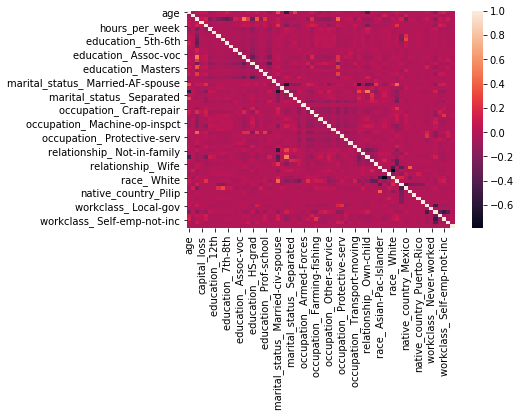

In [31]:
import seaborn as sns
sns.heatmap(X.corr())

In [38]:
#to extract list of most related colunns
c = X.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort",ascending=False)

print(so[-3908:-3896])#3908 is number we ot from multiplication num of cols(63*63) aft it we take numbers accoprdinly usin - as we doin it from downwards

occupation_ Handlers-cleaners       occupation_ Handlers-cleaners         1.000000
age                                 age                                   1.000000
race_ White                         race_ Black                           0.791096
race_ Black                         race_ White                           0.791096
marital_status_ Never-married       marital_status_ Married-civ-spouse    0.645362
marital_status_ Married-civ-spouse  marital_status_ Never-married         0.645362
                                    relationship_ Not-in-family           0.539571
relationship_ Not-in-family         marital_status_ Married-civ-spouse    0.539571
marital_status_ Never-married       age                                   0.538250
age                                 marital_status_ Never-married         0.538250
marital_status_ Never-married       relationship_ Own-child               0.510863
relationship_ Own-child             marital_status_ Never-married         0.510863
dtyp

In [22]:
#Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
m1 = ExtraTreesClassifier()
m1.fit(X,y)

ExtraTreesClassifier()

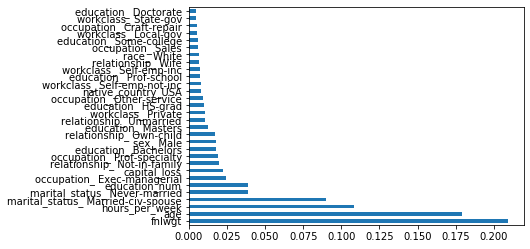

In [39]:
#plottin the feature importances
rank_features = pd.Series(m1.feature_importances_,index=X.columns)
rank_features.nlargest(30).plot.barh()
plt.show()

In [42]:
rank_features.nlargest(30).index

Index(['fnlwgt', 'age', 'hours_per_week', 'marital_status_ Married-civ-spouse',
       'marital_status_ Never-married', 'education_num',
       'occupation_ Exec-managerial', 'capital_loss',
       'relationship_ Not-in-family', 'occupation_ Prof-specialty',
       'education_ Bachelors', 'sex_ Male', 'relationship_ Own-child',
       'education_ Masters', 'relationship_ Unmarried', 'workclass_ Private',
       'education_ HS-grad', 'occupation_ Other-service', 'native_country_USA',
       'workclass_ Self-emp-not-inc', 'education_ Prof-school',
       'workclass_ Self-emp-inc', 'relationship_ Wife', 'race_ White',
       'occupation_ Sales', 'education_ Some-college', 'workclass_ Local-gov',
       'occupation_ Craft-repair', 'workclass_ State-gov',
       'education_ Doctorate'],
      dtype='object')

In [44]:
X = df[['fnlwgt', 'age', 'hours_per_week', 'marital_status_ Married-civ-spouse',
       'marital_status_ Never-married', 'education_num',
       'occupation_ Exec-managerial', 'capital_loss',
       'relationship_ Not-in-family', 'occupation_ Prof-specialty',
       'education_ Bachelors', 'sex_ Male', 'relationship_ Own-child',
       'education_ Masters', 'relationship_ Unmarried', 'workclass_ Private',
       'education_ HS-grad', 'occupation_ Other-service', 'native_country_USA',
       'workclass_ Self-emp-not-inc', 'education_ Prof-school',
       'workclass_ Self-emp-inc', 'relationship_ Wife', 'race_ White',
       'occupation_ Sales', 'education_ Some-college', 'workclass_ Local-gov',
       'occupation_ Craft-repair', 'workclass_ State-gov',
       'education_ Doctorate']]

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [56]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train,early_stopping_rounds=5, eval_set=[(X_train, y_train)],
             verbose=False)
print(xgb.score(X_train,y_train))


0.8498639913422446


In [58]:
predict = xgb.predict(X_test)

In [60]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predict))

[[10426   683]
 [ 1603  1941]]


In [61]:
print(metrics.accuracy_score(y_test,predict))

0.8439909916058145


In [62]:
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     11109
           1       0.74      0.55      0.63      3544

    accuracy                           0.84     14653
   macro avg       0.80      0.74      0.77     14653
weighted avg       0.84      0.84      0.84     14653



In [63]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

xgb: ROC AUC=0.896


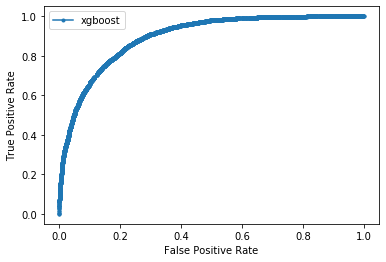

In [64]:
lr_probs = xgb.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('xgb: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='xgboost')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [66]:
#yperparameter optimization
params = {
        'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
        'max_depth' : [3,4,5,6,8,10,12,15],
         'min_child_weight' : [1,3,5,7],
          'gamma' : [0.0,0.1,0.2,0.3,0.4],
          'colsample_bytree' : [0.3,0.4,0.5,0.7]
}

In [67]:
#using randomized searchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost
classifier = xgboost.XGBClassifier()
random_search = RandomizedSearchCV(classifier,param_distributions = params,n_iter = 5,scoring = 'roc_auc',n_jobs = -1,cv = 5,verbose = 3 )

In [68]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   45.0s finished


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [69]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=6,
              min_child_weight=7)

In [71]:
classifier = xgboost.XGBClassifier(colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=6,
              min_child_weight=7)
classifier.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=6,
              min_child_weight=7)

In [72]:
predict = classifier.predict(X_test)

In [73]:
print(metrics.accuracy_score(y_test,predict))

0.8451511635842489


xgb: ROC AUC=0.899


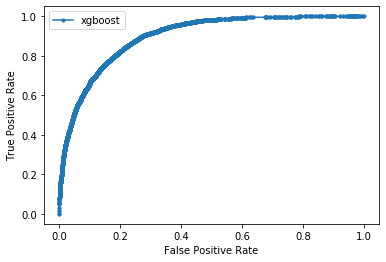

In [74]:
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('xgb: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='xgboost')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()